# Example 2.1: Correlation and auto-correlation
This example consists of two parts. The first part will look at correlation and present a procedure to generate realizations of correlated Gaussian random variables in Python. The second part will look into how to make realizations of time series with a given auto correlation in Python.

## Part 1: Monte Carlo simulation of correlated Gaussian variables
Consider a vector of random variables $\mathbf{X}(t)$. We consider a case with two variables $X_1$ and $X_2$ that are loads acting on a two-story portal frame. The loads are correlated Gaussian distributed random variables. This means that the loads can be defined by a vector of mean values $m_x$

$$ \bf{m}_{\bf{x}} = \left[ \begin{array}{c} m_{X_1} \\ m_{X_2} \end{array} \right] $$

and a covariance matrix $\mathbf{\Sigma_x}^2$

$$ \Sigma _{\bf{x}}^2 = \left[ \begin{array}{c c}
{\sigma _{X_1}^2}&{\rho _{X_1X_2}\sigma _{X_1}\sigma _{X_2}}\\
{\rho _{X_2X_1}\sigma _{X_2}\sigma _{X_1}}&{\sigma _{X_2}^2}
\end{array} \right] $$

Here $\sigma _{{X_1}}$ and $\sigma _{{X_1}}$ are the the standard deviation, while $\sigma^2 _{{X_1}}$ and $\sigma^2 _{{X_2}}$ are the the variance of $X_1$ and $X_2$. The correlation coefficient is denoted $\rho _{{X_2}{X_1}}$.

We will now assume that the mean values of $X_1$ and $X_2$ are zero and that the standard deviation of both processes is one and generate data for different correlation coefficients.

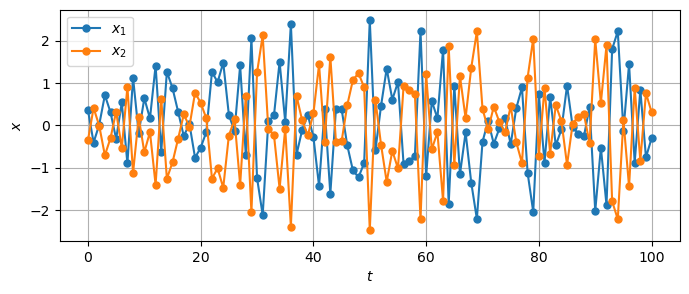

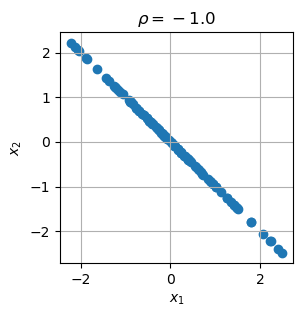

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import time

# Make scatter plot that illustrates linear correlation
mean_X = np.array([0, 0]) # Mean values
sigma1 = 1.0 # Standard deviation of X1
sigma2 = 1.0 # Standard deviation of X2
rho12 = -1.0 # correlation coefficient between -1 and 1
Nsim = 101 # Number of points
cov_X = np.array([[sigma1**2, sigma1*sigma2*rho12], [sigma1*sigma2*rho12, sigma2**2]]) # Covariance matrix
X = np.random.multivariate_normal(mean_X,cov_X,Nsim) # Monte Carlo simulation of correlated Gaussian (normal) variables

# Scatter plot
plt.figure(figsize=(8, 3))
plt.plot(X[:,0],marker='o',label = '$x_1$',markersize=5)
plt.plot(X[:,1],marker='o',label = '$x_2$',markersize=5)
plt.ylabel(r'$x$')
plt.xlabel(r'$t$')
plt.grid()
plt.legend()

plt.figure(figsize=(3, 3))
plt.scatter(X[:,0],X[:,1],label='$x_2$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.title(r'$\rho=' + str(rho12) + '$');


The top figure shows the series of points generated for the stochastic processes $X_1$ and $X_2$ while the bottom shows a scatter plot. Try to change the correlation coefficient in the cell above and investigate how the time series and the scatter plot depends on the correlation coefficient. 

The time series shown in the top figure is very irregular because there are many significant changes when going from one point to the next. This leaves the impression that the correlation to neighbouring samples is low. We can, for instance, not give a reasonable estimate of the value at 61 seconds based on the value of the time series at 60 seconds. This is because the time series have been generated without considering auto-correlation. We will look into auto-correlation in the next part of this example.

## Part two: Simulation of time series with a given auto correlation function
Auto-correlation describes how a stochastic process is correlated with itself considering a time lag $\tau$

$$R_{X_1}(\tau)= E[X_1(t)X_1(t+\tau)]$$

A typical auto-correlation function is defined as follows.

$$R(\tau)=\frac{\sigma_{X_1}^2}{\omega_{c}\tau}\sin(\omega_{c}\tau)$$

Here, $\omega_c$ is a cutoff frequency.

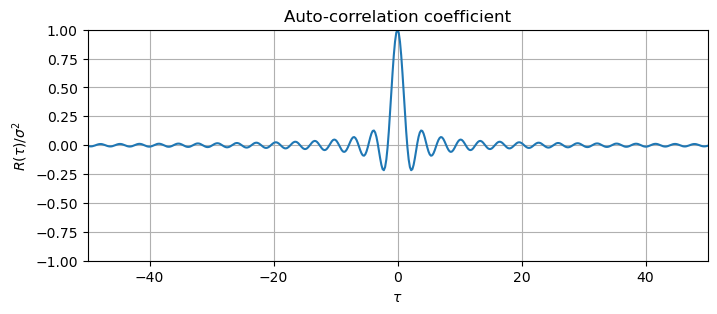

In [29]:
# Define auto-correlation function
dt = 0.2
tau = np.arange(-50,50+dt,dt) # Tau vector

omega_c = 2.0 # Cut-off frequency
sigma = 3.0 # Standard deviation
R = sigma**2/(omega_c*tau)*np.sin(omega_c*tau) # Auto correlation function

R_norm=R/sigma**2 # Normalized auto correlation

plt.figure(figsize=(8,3))
plt.plot(tau,R_norm)
plt.xlim(-50,50)
plt.ylim(-sigma**2,sigma**2)
plt.ylim(-1,1)
plt.grid()
plt.ylabel(r'$R(\tau)/\sigma^2$')
plt.xlabel(r'$\tau$')
plt.title('Auto-correlation coefficient');

The figure above shows that the auto correlation coefficient approaches one as the time lag approaches zero. This is because the correlation is perfect when the time lag is minimal. It is also seen that the correlation drops quickly and becomes negative and oscillates as the time lag increases. An auto correlation function is always symmetric about the vertical axis, but it does not necessarily oscillate or go to zero as $\tau$ increases. 

We will now use the auto-correlation function to generate realizations of $X_1$, assuming that the auto-correlation function above applies. We then need to consider all the points in the time series as correlated Gaussian variables. We define a vector of mean values and a covariance matrix defined by the auto-correlation function. 

We first have to establish a time vector with $N$ elements:

$$
\mathbf{t}=
\left[t_1 , t_2 , t_3, \dots, t_{N}
\right]
$$

We generate the $N$ points of the time series by using the following $N\times 1$  vector of mean values:

$${{\bf{m}}_{\bf{x}}} = \left[ {\begin{array}{c}
{{m_{{X_1}}}({t_1})}\\
 \vdots \\
{{m_{{X_1}}}({t_N})}
\end{array}} \right]$$

and $N\times N$ covariance matrix:

$$\mathbf{\Sigma} _{\mathbf{X}_1}^2 = \left[ {\begin{array}{cc}
{{R_{{X_1}}}(0)}&{{R_{{X_1}}}({t_1} - {t_2})}& \cdots &{{R_{{X_1}}}({t_1} - {t_N})}\\
{{R_{{X_1}}}({t_2} - {t_1})}&{{R_{{X_1}}}(0)}& \cdots &{{R_{{X_1}}}({t_2} - {t_N})}\\
 \vdots & \vdots & \ddots & \vdots \\
{{R_{{X_1}}}({t_N} - {t_1})}&{{R_{{X_1}}}({t_N} - {t_2})}& \cdots &{{R_{{X_1}}}(0)}
\end{array}} \right]$$

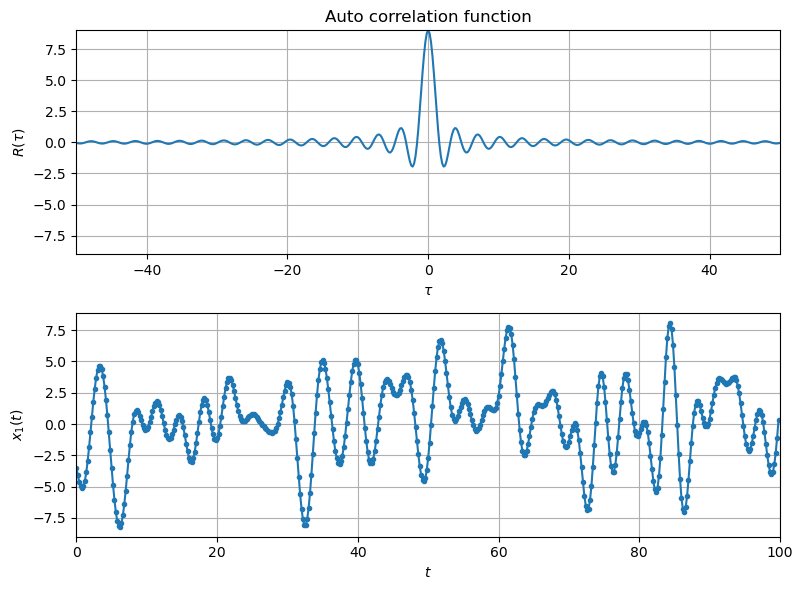

In [30]:
# Use auto correlation function to generate stochastic time series

t=np.arange(0,100,dt)

tau_mat = np.abs(np.array([t])-np.array([t]).T) # Matrix of all possible time lags
tau_mat[tau_mat==0] = np.finfo(float).eps # Avoid the singularity when tau = 0
mean = np.zeros((t.shape[0])) # Vector of mean values 
cov = sigma**2/(omega_c*tau_mat)*np.sin(omega_c*tau_mat) # Co-variance matrix defined using the auto-correlation function

#t0=time.time()
X = np.random.multivariate_normal(mean,cov,3) # Simulate the points
#t1=time.time()


fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(tau, R)
axs[0].set_ylabel(r'$R(\tau)$')
axs[0].set_xlabel(r'$\tau$')
axs[0].set_xlim(-50,50)
axs[0].set_ylim(-sigma**2,sigma**2)
axs[0].grid(True)
axs[0].set_title('Auto correlation function')

axs[1].plot(t, X[0,:],marker='o', markersize=3) 
axs[1].set_ylabel(r'$x_1(t)$')
axs[1].set_xlabel(r'$t$')
axs[1].set_xlim(0,100)
axs[1].grid(True)

plt.tight_layout()


The bottom figure above shows one particular realization of the stochastic process $X_1$ with the given auto-correlation function. The time series above has different characteristics than the time series generated in the first part of this example. The time series above is smooth, and the points follow a pattern defined by the auto-correlation function. This is because nearby points will attain similar values since they are strongly correlated. Try to execute the cell above to get more realizations, change the cutoff frequency $\omega_c$, and study how the characteristics of the simulated time series change.